# Lecture 2: A Walk through Data Mining
---

In [29]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

# 1 Toy Example 1: Regression
## 1.1 Data generation
$$y = e^{-(x-3)^2} + N(0, 0.1),  x\geq0$$

In [3]:
ffun = lambda x: math.exp(-(x-3)**2)
ffun = np.vectorize(ffun)

np.random.seed(seed = 2017)

x = np.arange(0.1, 4.1, 0.1)
y = ffun(x) + 0.1*np.random.normal(size=len(x))

In [4]:
DataX = DataFrame({'x': x, 'y': y})

In [5]:
pd.options.display.max_rows = 10
DataX

,x,y
0,0.1,-0.102072
1,0.2,-0.013646
2,0.3,0.020592
3,0.4,0.058507
4,0.5,-0.037527
...,...,...
35,3.6,0.589007
36,3.7,0.615242
37,3.8,0.493638
38,3.9,0.392832


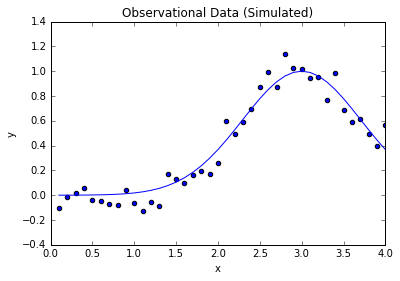

In [6]:
plt.scatter(x,y)
plt.plot(x, ffun(x))
plt.title('Observational Data (Simulated)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,4]);

Alternative method for plotting scatter plot
```python
plot=DataX.plot.scatter(x='x',y='y').set_title('Simulated Toy Example')
```

## 1.2 Data Exploration

In [7]:
DataX.describe()

,x,y
count,40.000000,40.000000
mean,2.050000,0.397721
std,1.169045,0.410285
min,0.100000,-0.129335
25%,1.075000,0.012032
50%,2.050000,0.325889
75%,3.025000,0.713357
max,4.000000,1.142684


### Calculate the covariance between x and y
Method 1: numpy

In [8]:
corr1 = np.corrcoef(x,y)[0,1]
print 'The covariance between x and y is {}'.format(corr1)

The covariance between x and y is 0.801511522813


Method 2: pandas

In [9]:
corr2 = DataX.corr().values[0,1]
print 'The covariance between x and y is {}'.format(corr2)

The covariance between x and y is 0.801511522813


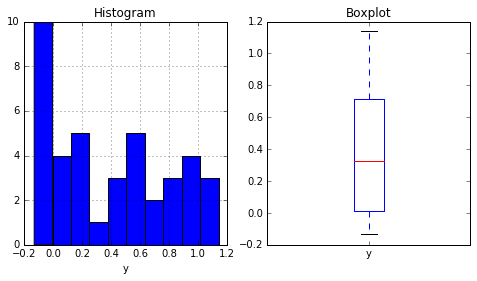

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
plt.figure(1) 
plt.subplot(121)
DataX['y'].hist().set_title('Histogram');
plt.xlabel('y');
plt.subplot(122)
DataX['y'].plot.box().set_title('Boxplot');

## 1.3 Linear Regression

In [11]:
def curve_fitting(x, y, degrees):
    p = np.polyfit(x, y, degrees)
    q = np.poly1d(p)
    plt.plot(x, q(x))
    return q(x)

/Users/lutaodai/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


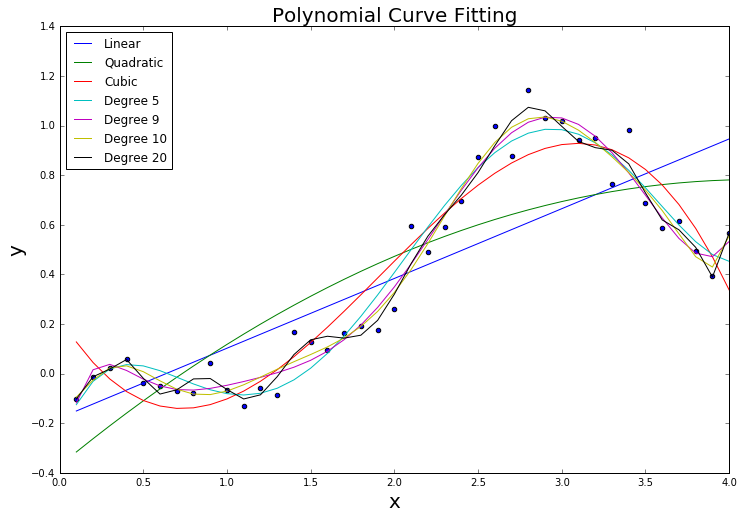

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

plt.scatter(x,y)
plt.xlim([0,4]);

fit1 = curve_fitting(x, y, 1) # Linear model
fit2 = curve_fitting(x, y, 2) # Quadratic model
fit3 = curve_fitting(x, y, 3) # Cubic model
fit4 = curve_fitting(x, y, 5) # Degree 5
fit5 = curve_fitting(x, y, 9) # Degree 9
fit6 = curve_fitting(x, y, 10) # Degree 10
fit7 = curve_fitting(x, y, 20) # Degree 20

plt.xlabel('x', fontsize=20);
plt.ylabel('y', fontsize=20);
plt.title('Polynomial Curve Fitting', fontsize=20)

plt.legend(['Linear','Quadratic', 'Cubic', 'Degree 5', 'Degree 9', 'Degree 10', 'Degree 20'], loc=2);

/Users/lutaodai/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


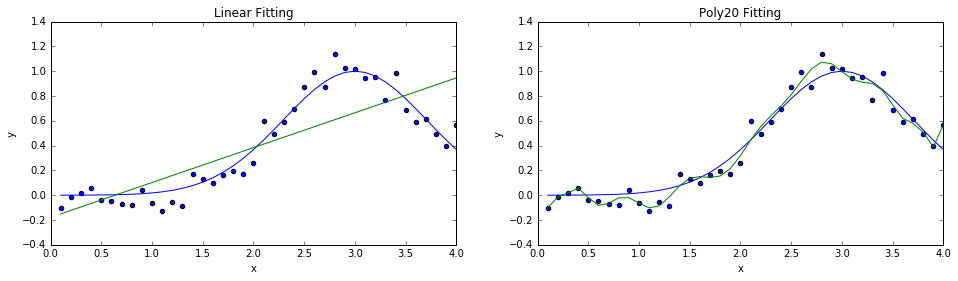

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)

plt.subplot(121)
plt.scatter(x,y)
plt.plot(x, ffun(x))
plt.title('Linear Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,4]);
curve_fitting(x, y, 1);

plt.subplot(122)
plt.scatter(x,y)
plt.plot(x, ffun(x))
plt.title('Poly20 Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,4]);
curve_fitting(x, y, 20);

## 1.4 Mean Squared Error (MSE)
$$MSE=\frac{1}n \sum_{i=1}^{n}[y_i-\hat{f}(x)]^2$$

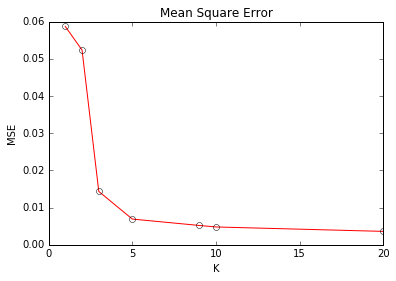

In [14]:
n = len(x)
MSE = []
MSE.append(sum((y-fit1)**2)/n)
MSE.append(sum((y-fit2)**2)/n)
MSE.append(sum((y-fit3)**2)/n)
MSE.append(sum((y-fit4)**2)/n)
MSE.append(sum((y-fit5)**2)/n)
MSE.append(sum((y-fit6)**2)/n)
MSE.append(sum((y-fit7)**2)/n)
K = [1, 2, 3, 5, 9, 10, 20]

plt.plot(K, MSE, 'ro-', mfc = 'none')
plt.title('Mean Square Error')
plt.xlabel('K')
plt.ylabel('MSE')

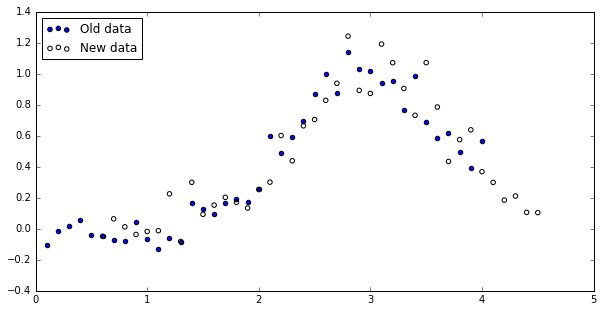

In [15]:
np.random.seed(seed = 9999)

xnew = np.arange(0.6, 4.6, 0.1)
ynew = ffun(xnew) + 0.1*np.random.normal(size=len(xnew))

TextX = DataFrame({'xnew': xnew, 'ynew': ynew})

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.scatter(x, y)
plt.xlim([0,5])
plt.scatter(xnew, ynew, facecolor='none');
plt.legend(['Old data','New data'],loc=2);

In [16]:
def predict(x, y, degrees, xnew):
    p = np.polyfit(x, y, degrees)
    q = np.poly1d(p)
    return q(xnew)

predictions = [predict(x, y, i, xnew) for i in [1, 2, 3, 5, 9]]
nnew = TextX.shape[0]
TestMSE = [sum((ynew - pred)**2)/nnew for pred in predictions]

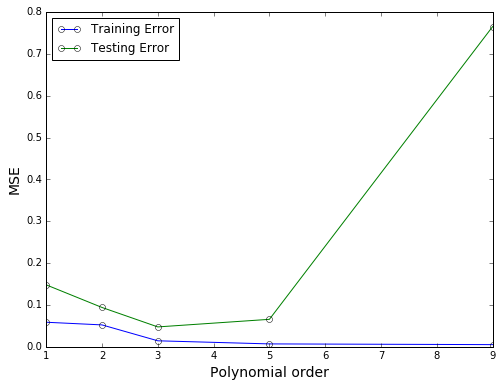

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

plt.plot(K[:-2], MSE[:-2], 'o-',label='Training Error', mfc='none')
plt.plot(K[:-2], TestMSE, 'o-', label = 'Testing Error', mfc='none')
plt.legend(loc=2);
plt.xlabel('Polynomial order',fontsize=14);
plt.ylabel('MSE',fontsize=14);

In [18]:
predictions = [predict(x, y, i, xnew) for i in [1, 2, 3, 5, 9, 10, 20]]
nnew = TextX.shape[0]
TestMSE = [sum((ynew - pred)**2)/nnew for pred in predictions]
pd.options.display.float_format = '{:,.2f}'.format
DataFrame({'Polynomial Order' : K,
         'Testing Error' : TestMSE})

/Users/lutaodai/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


,Polynomial Order,Testing Error
0,1,0.15
1,2,0.09
2,3,0.05
3,5,0.07
4,9,0.77
5,10,15.02
6,20,"2,377,055.96"


Related topics:
* Training data, testing data
* Types of errors
* Overfitting
* Bias-variance trade-off

## 1.5 Smoothing Spline

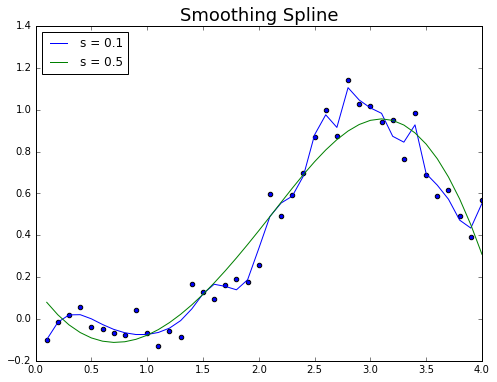

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.scatter(x, y); plt.xlim([0,4])
plt.title('Smoothing Spline', fontsize=18);

y1 = interpolate.UnivariateSpline(x, y, s=0.1)(x);
plt.plot(x, y1,label='s = 0.1');
y2 = interpolate.UnivariateSpline(x, y, s=0.5)(x);
plt.plot(x, y2,label='s = 0.5');

plt.legend(loc=2);

# 2 Toy example 2: Classification

In [32]:
y1